# NutrIA – Run B: FE + Full Fine-Tuning (toutes couches)

Ce notebook implémente :
- **Phase 1** : Feature Extraction (3 epochs, LR=1e-3, base gelée)
- **Phase 2** : Full Fine-Tuning (10 epochs, LR=1e-4, toutes les couches dégelées)

Objectif : Comparer avec le Partial Fine-Tuning (Run A) sur base égale.

In [1]:
!pip install --upgrade pip

!pip install "tensorflow-datasets" matplotlib pandas scikit-learn "tensorflow[and-cuda]"

In [2]:
import tensorflow as tf

print("✅ TensorFlow version:", tf.__version__)

print("🖥️  GPUs disponibles:", tf.config.list_physical_devices("GPU"))

2025-12-11 21:11:12.699575: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-11 21:11:12.782405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 21:11:16.669793: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


✅ TensorFlow version: 2.20.0
🖥️  GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


✅ TensorFlow version: 2.20.0
🖥️  GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

📥 Chargement du dataset Food-101...



I0000 00:00:1765487561.345940  273182 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11770 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5
2025-12-11 21:12:41.553404: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


Nombre de classes : 101
Exemples de classes : ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


2025-12-11 21:12:44.251881: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Aperçu tabulaire (train) :
         id  label_id   label_name
0  sample_0        77    pork_chop
1  sample_1        52        gyoza
2  sample_2        68  onion_rings
3  sample_3        84      risotto
4  sample_4        84      risotto

🔍 Exemple d'images du dataset :


2025-12-11 21:12:44.613420: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


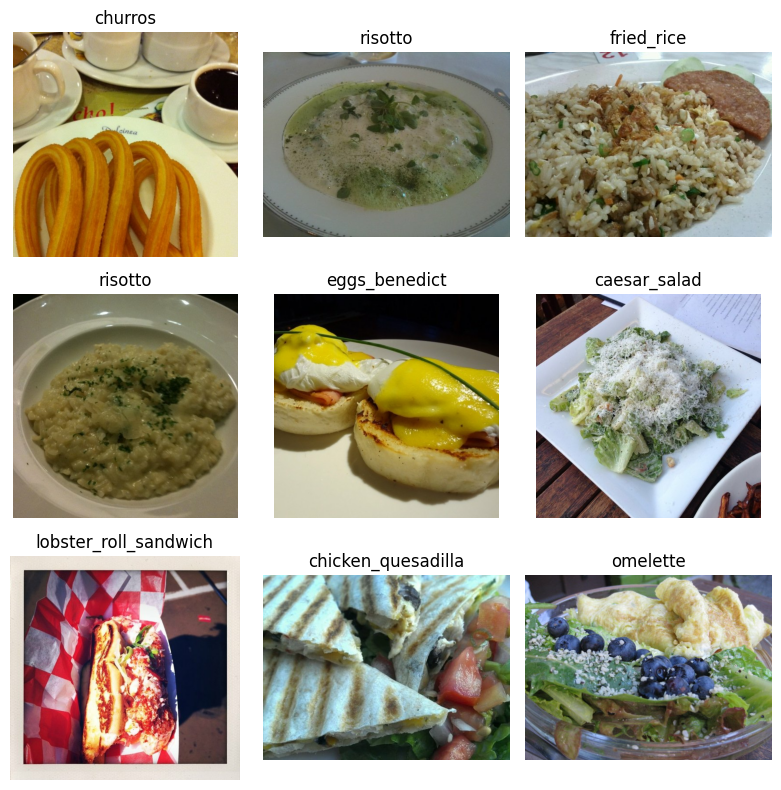


Taille estimée des splits :
Taille train (approx) : 68175
Taille val   (approx) : 7575
Taille test  (TFDS)   : 25250

✅ data_augmentation true

✅ Pipelines tf.data prêts (train / val / test).

 Architecture du modèle (base gelée) :


Model: "CaloriIA_MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avg_pool                        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,387,365 (9.11 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)



 PHASE 1 : FEATURE EXTRACTION (base gelée)

🚀 Entraînement Feature Extraction pour 3 epochs (LR=0.001)...
Epoch 1/3


2025-12-11 21:13:03.429111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 418 of 1000
2025-12-11 21:13:06.318732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
2025-12-11 21:13:06.485698: I external/local_xla/xla/service/service.cc:163] XLA service 0x71496002d0a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-11 21:13:06.485789: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-12-11 21:13:06.766312: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-11 21:13:07.823717: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-12-11 21:13:16.862507: E external/local_xla/xla/stream_executor/cuda/cuda_timer.c

2129/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.3901 - loss: 2.5706

2025-12-11 21:17:50.499612: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 21:17:50.636213: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3901 - loss: 2.5702

2025-12-11 21:18:19.446523: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 21:18:19.589356: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 335s 142ms/step - accuracy: 0.4757 - loss: 2.1258 - val_accuracy: 0.5659 - val_loss: 1.7067
Epoch 2/3


2025-12-11 21:18:33.270524: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 560 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:14:57 12s/step - accuracy: 0.5000 - loss: 1.7505

2025-12-11 21:18:35.295327: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 279s 125ms/step - accuracy: 0.5765 - loss: 1.6580 - val_accuracy: 0.5864 - val_loss: 1.6241
Epoch 3/3


2025-12-11 21:23:11.823455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 558 of 1000
2025-12-11 21:23:13.923823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 290s 130ms/step - accuracy: 0.6071 - loss: 1.5212 - val_accuracy: 0.6202 - val_loss: 1.4755

📈 Courbes d'entraînement – Phase 1 (Feature Extraction) :


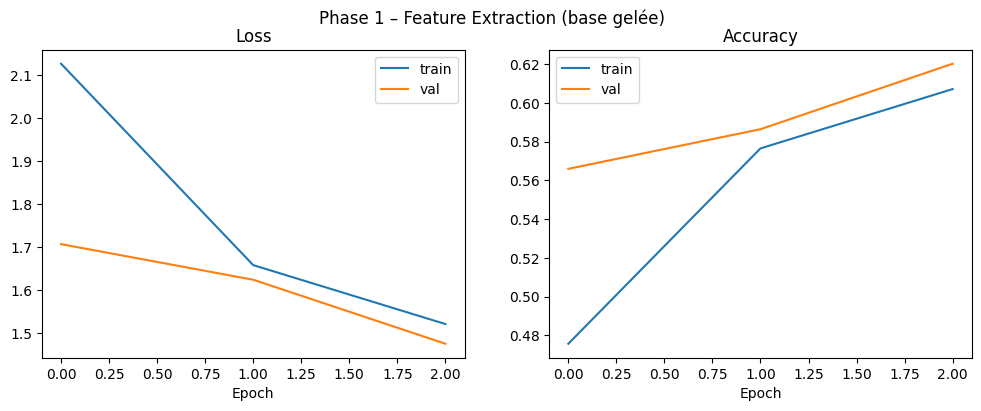


🧪 Évaluation après Feature Extraction...
788/790 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6129 - loss: 1.4662

2025-12-11 21:28:36.298038: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 21:28:36.436181: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 21:28:36.573774: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


790/790 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.6135 - loss: 1.4641
✅ Test accuracy (après FE) : 0.6135
✅ Test loss     (après FE) : 1.4641

🔥 PHASE 2 : FULL FINE-TUNING (toutes les couches)

🔓 Couches dégelées : 154 / 154 (TOUTES)

🚀 Entraînement Full Fine-Tuning pour 10 epochs (LR=0.0001)...
Epoch 1/10


2025-12-11 21:29:17.524221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 630 of 1000
2025-12-11 21:29:19.265016: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5629 - loss: 1.7179
Epoch 1: val_loss improved from None to 1.37360, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 483s 193ms/step - accuracy: 0.6126 - loss: 1.4816 - val_accuracy: 0.6496 - val_loss: 1.3736
Epoch 2/10


2025-12-11 21:36:53.661420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 539 of 1000
2025-12-11 21:36:55.669088: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7175 - loss: 1.0481
Epoch 2: val_loss improved from 1.37360 to 1.14062, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 395s 180ms/step - accuracy: 0.7194 - loss: 1.0391 - val_accuracy: 0.6987 - val_loss: 1.1406
Epoch 3/10


2025-12-11 21:43:28.430166: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 612 of 1000
2025-12-11 21:43:30.364115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.7707 - loss: 0.8329
Epoch 3: val_loss improved from 1.14062 to 1.13188, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 390s 177ms/step - accuracy: 0.7707 - loss: 0.8303 - val_accuracy: 0.7071 - val_loss: 1.1319
Epoch 4/10


2025-12-11 21:49:58.019103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 507 of 1000
2025-12-11 21:50:00.294460: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2130/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.8144 - loss: 0.6637
Epoch 4: val_loss improved from 1.13188 to 0.97942, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 400s 182ms/step - accuracy: 0.8094 - loss: 0.6775 - val_accuracy: 0.7366 - val_loss: 0.9794
Epoch 5/10


2025-12-11 21:56:38.407550: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 573 of 1000
2025-12-11 21:56:40.619448: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2130/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8450 - loss: 0.5464
Epoch 5: val_loss improved from 0.97942 to 0.85008, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 395s 180ms/step - accuracy: 0.8390 - loss: 0.5659 - val_accuracy: 0.7675 - val_loss: 0.8501
Epoch 6/10


2025-12-11 22:03:13.309600: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 535 of 1000
2025-12-11 22:03:15.533489: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8666 - loss: 0.4600
Epoch 6: val_loss improved from 0.85008 to 0.70891, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 396s 180ms/step - accuracy: 0.8573 - loss: 0.4903 - val_accuracy: 0.8030 - val_loss: 0.7089
Epoch 7/10


2025-12-11 22:09:49.158615: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 581 of 1000
2025-12-11 22:09:51.359316: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8918 - loss: 0.3783
Epoch 7: val_loss improved from 0.70891 to 0.67297, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 390s 177ms/step - accuracy: 0.8813 - loss: 0.4097 - val_accuracy: 0.8098 - val_loss: 0.6730
Epoch 8/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9045 - loss: 0.3247
Epoch 8: val_loss improved from 0.67297 to 0.63634, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 430s 173ms/step - accuracy: 0.8949 - loss: 0.3545 - val_accuracy: 0.8275 - val_loss: 0.6363
Epoch 9/10


2025-12-11 22:23:28.439979: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 896 of 1000
2025-12-11 22:23:28.979133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2130/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9181 - loss: 0.2848
Epoch 9: val_loss improved from 0.63634 to 0.57953, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 398s 182ms/step - accuracy: 0.9090 - loss: 0.3108 - val_accuracy: 0.8356 - val_loss: 0.5795
Epoch 10/10


2025-12-11 22:30:06.704127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 589 of 1000
2025-12-11 22:30:08.712546: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9257 - loss: 0.2521
Epoch 10: val_loss improved from 0.57953 to 0.52744, saving model to best_model_full_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 391s 178ms/step - accuracy: 0.9185 - loss: 0.2754 - val_accuracy: 0.8486 - val_loss: 0.5274
Restoring model weights from the end of the best epoch: 10.

📈 Courbes d'entraînement – Phase 2 (Full Fine-Tuning) :


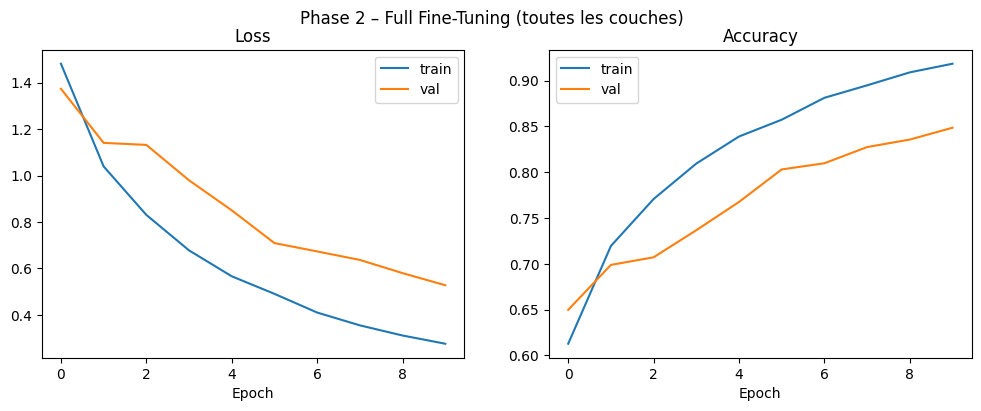


🧪 ÉVALUATION FINALE SUR LE TEST SET
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7288 - loss: 1.1540

✅ Test accuracy (final) : 0.7288
✅ Test loss     (final) : 1.1540

📊 Récapitulatif :
  - Après Feature Extraction : acc = 0.6135
  - Après Full Fine-Tuning   : acc = 0.7288
  - Gain                     : +11.54%

📤 Génération des prédictions sur le test set...

📊 Rapport de classification :
                         precision    recall  f1-score   support

              apple_pie       0.44      0.54      0.48       250
         baby_back_ribs       0.91      0.64      0.76       250
                baklava       0.77      0.87      0.82       250
         beef_carpaccio       0.43      0.94      0.59       250
           beef_tartare       0.73      0.66      0.70       250
             beet_salad       0.75      0.49      0.59       250
               beignets       0.90      0.77      0.83       250
               bibimbap       0.93      0.82      0.87       250
       

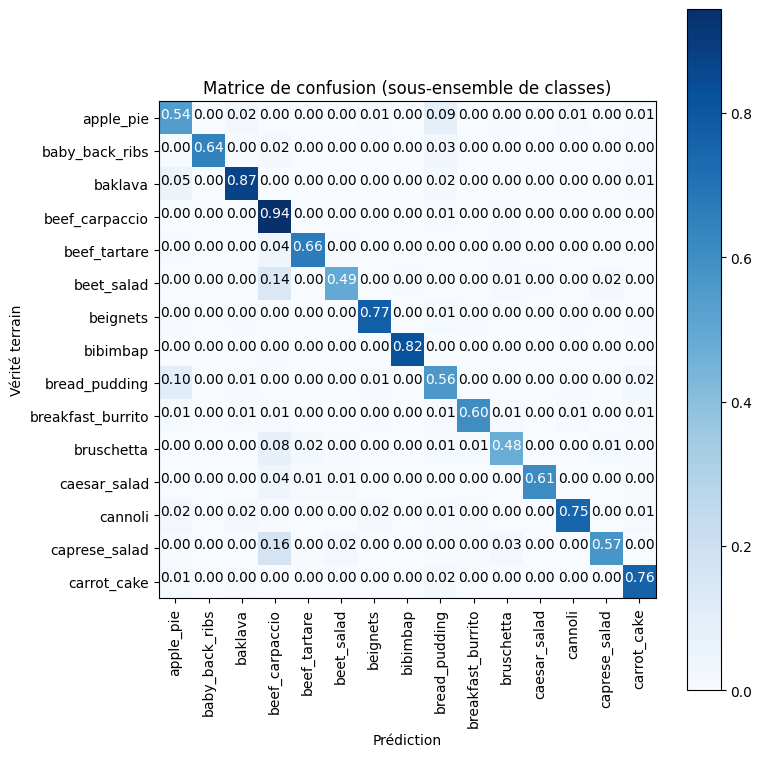

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

print("✅ TensorFlow version:", tf.__version__)
print("🖥️  GPUs disponibles:", tf.config.list_physical_devices("GPU"))

gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    try:
        tf.config.experimental.set_memory_growth(gpu, True)
    except Exception as e:
        print("⚠️ Impossible de régler memory_growth pour ce GPU :", e)

# -----------------------------
# Hyperparamètres globaux
# -----------------------------
AUTOTUNE   = tf.data.AUTOTUNE
IMG_SIZE   = (224, 224)
IMG_SHAPE  = IMG_SIZE + (3,)
BATCH_SIZE = 32

# -----------------------------
# Configuration 
# -----------------------------
EPOCHS_FE   = 3    # Feature Extraction
EPOCHS_FT   = 10   # Fine-Tuning
LR_FE       = 1e-3 # Learning rate pour FE
LR_FT       = 1e-4 # Learning rate pour FT

print("\n📥 Chargement du dataset Food-101...\n")

# -----------------------------
# Chargement du dataset
# -----------------------------
(ds_train_raw, ds_test_raw), ds_info = tfds.load(
    "food101",
    split=["train", "validation"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

class_names = ds_info.features["label"].names
num_classes = len(class_names)

print(f"Nombre de classes : {num_classes}")
print("Exemples de classes :", class_names[:10])


def ds_to_dataframe(ds, max_samples=1000):
    file_ids = []
    labels   = []
    for i, (_, label) in enumerate(ds.take(max_samples)):
        file_ids.append(f"sample_{i}")
        labels.append(int(label.numpy()))
    df = pd.DataFrame({"id": file_ids, "label_id": labels})
    df["label_name"] = df["label_id"].apply(lambda i: class_names[i])
    return df


df_train_preview = ds_to_dataframe(ds_train_raw, max_samples=2000)
print("\nAperçu tabulaire (train) :")
print(df_train_preview.head())


def show_examples(ds, class_names, n=9):
    plt.figure(figsize=(8, 8))
    for i, (image, label) in enumerate(ds.take(n)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(class_names[int(label.numpy())])
        plt.axis("off")
    plt.tight_layout()
    plt.show()


print("\n🔍 Exemple d'images du dataset :")
show_examples(ds_train_raw, class_names, n=9)

# -----------------------------
# Split Train / Val
# -----------------------------
VAL_RATIO = 0.1

ds_train_size = ds_info.splits["train"].num_examples
val_size = int(VAL_RATIO * ds_train_size)

ds_val   = ds_train_raw.take(val_size)
ds_train = ds_train_raw.skip(val_size)

print("\nTaille estimée des splits :")
print("Taille train (approx) :", ds_train_size - val_size)
print("Taille val   (approx) :", val_size)
print("Taille test  (TFDS)   :", ds_info.splits["validation"].num_examples)

# -----------------------------
# Prétraitement & Data Augmentation
# -----------------------------
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)
    return image, label


data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
    ],
    name="data_augmentation",
)

USE_dataAUG = True

def prepare_dataset(ds, training=True):
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    if training and USE_dataAUG:
        ds = ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=AUTOTUNE,
        )
        ds = ds.shuffle(1000)
        print("\n✅ data_augmentation true")
    elif training:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)
    return ds


train_ds = prepare_dataset(ds_train, training=True)
val_ds   = prepare_dataset(ds_val, training=False)
test_ds  = prepare_dataset(ds_test_raw, training=False)

print("\n✅ Pipelines tf.data prêts (train / val / test).")

# -----------------------------
# Construction du modèle
# -----------------------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet",
)

base_model.trainable = False  # Base gelée pour Feature Extraction

global_avg_pool   = layers.GlobalAveragePooling2D(name="avg_pool")
prediction_layer  = layers.Dense(num_classes, activation="softmax", name="predictions")

inputs  = tf.keras.Input(shape=IMG_SHAPE)
x       = base_model(inputs, training=False)
x       = global_avg_pool(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs, name="CaloriIA_MobileNetV2")

print("\n Architecture du modèle (base gelée) :")
model.summary()

# =====================================================
# PHASE 1 : FEATURE EXTRACTION (base gelée)
# =====================================================
print("\n" + "="*60)
print("\n PHASE 1 : FEATURE EXTRACTION (base gelée)")
print("="*60)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR_FE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

print(f"\n🚀 Entraînement Feature Extraction pour {EPOCHS_FE} epochs (LR={LR_FE})...")
history_fe = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FE,
)


def plot_history(history, title="Historique d'entraînement"):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="val")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="val")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()

    plt.suptitle(title)
    plt.show()


print("\n📈 Courbes d'entraînement – Phase 1 (Feature Extraction) :")
plot_history(history_fe, title="Phase 1 – Feature Extraction (base gelée)")

print("\n🧪 Évaluation après Feature Extraction...")
test_loss_fe, test_acc_fe = model.evaluate(test_ds)
print(f"✅ Test accuracy (après FE) : {test_acc_fe:.4f}")
print(f"✅ Test loss     (après FE) : {test_loss_fe:.4f}")

# =====================================================
# PHASE 2 : FULL FINE-TUNING (toutes les couches)
# =====================================================
print("\n" + "="*60)
print("🔥 PHASE 2 : FULL FINE-TUNING (toutes les couches)")
print("="*60)

base_model.trainable = True  #  Tout dégeler

num_trainable = sum([layer.trainable for layer in base_model.layers])
print(f"\n🔓 Couches dégelées : {num_trainable} / {len(base_model.layers)} (TOUTES)")

# Callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "best_model_full_ft.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Recompilation avec LR plus bas
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR_FT),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

print(f"\n🚀 Entraînement Full Fine-Tuning pour {EPOCHS_FT} epochs (LR={LR_FT})...")
history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FT,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

print("\n📈 Courbes d'entraînement – Phase 2 (Full Fine-Tuning) :")
plot_history(history_ft, title="Phase 2 – Full Fine-Tuning (toutes les couches)")

# =====================================================
# ÉVALUATION FINALE
# =====================================================
print("\n" + "="*60)
print("🧪 ÉVALUATION FINALE SUR LE TEST SET")
print("="*60)

test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test accuracy (final) : {test_acc:.4f}")
print(f"✅ Test loss     (final) : {test_loss:.4f}")

print("\n📊 Récapitulatif :")
print(f"  - Après Feature Extraction : acc = {test_acc_fe:.4f}")
print(f"  - Après Full Fine-Tuning   : acc = {test_acc:.4f}")
print(f"  - Gain                     : +{(test_acc - test_acc_fe)*100:.2f}%")

# -----------------------------
# Rapport de classification
# -----------------------------
y_true = []
y_pred = []

print("\n📤 Génération des prédictions sur le test set...")
for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n📊 Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)


def plot_confusion_matrix(cm, class_names, normalize=True, max_classes=15):
    num_classes = min(len(class_names), max_classes)
    cm_plot = cm[:num_classes, :num_classes]
    labels_plot = class_names[:num_classes]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm_plot, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Matrice de confusion (sous-ensemble de classes)")
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels_plot, rotation=90)
    plt.yticks(ticks=tick_marks, labels=labels_plot)

    fmt = ".2f" if normalize else "d"
    thresh = cm_plot.max() / 2.0
    for i, j in itertools.product(range(cm_plot.shape[0]), range(cm_plot.shape[1])):
        plt.text(
            j,
            i,
            format(cm_plot[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm_plot[i, j] > thresh else "black",
        )

    plt.ylabel("Vérité terrain")
    plt.xlabel("Prédiction")
    plt.tight_layout()
    plt.show()


print("\n📉 Matrice de confusion (normalisée) – 15 premières classes :")
plot_confusion_matrix(cm_norm, class_names, normalize=True, max_classes=15)

In [4]:
import os
import tensorflow as tf

os.makedirs("models", exist_ok=True)

MODEL_PATH = "models/caloriia_FE_FullFT_10ep.keras"
model.save(MODEL_PATH)

print(f"✅ Modèle sauvegardé : {MODEL_PATH}")

✅ Modèle sauvegardé : models/caloriia_FE_FullFT_10ep.keras
